# MMC Laboratorium 2

Autor: Jakub Ostrzołek

## Zadanie 3

### Definicja eksperymentu

Definicje funkcji wykonujących eksperyment Monte Carlo.

In [54]:
import numpy as np

CIRCLE_RADIUS = 1
SQUARE_SIDE_LENGTH = CIRCLE_RADIUS * 2
SQUARE_AREA = SQUARE_SIDE_LENGTH ** 2
CENTER = np.array([CIRCLE_RADIUS, CIRCLE_RADIUS])


def calculate_hit_ratios(n_points: int) -> float:
    gen = np.random.default_rng()
    points: np.ndarray = gen.random(size=(n_points, 2)) * SQUARE_SIDE_LENGTH
    squared_distances_from_center: np.ndarray = np.power((points - CENTER), 2).sum(
        axis=1
    )
    n_hits = (squared_distances_from_center <= (CIRCLE_RADIUS**2)).sum()

    return n_hits / n_points


def calculate_pi(hit_ratio: float) -> float:
    circle_area = hit_ratio * SQUARE_AREA
    pi = circle_area / CIRCLE_RADIUS**2
    return pi

### Wykonanie eksperymentu
Wykonanie eksperymentu dla różnych wartości od $10$ do $100 \, 000$ w skali logarytmicznej.

In [67]:
ns = np.logspace(1, 5, 15).astype(int)
display(ns)

hit_ratios = np.array([calculate_hit_ratios(n) for n in ns])
pis = np.array([calculate_pi(hit_ratio) for hit_ratio in hit_ratios])
std_devs = np.array([
    SQUARE_AREA * np.sqrt(1 / n * hit_ratio * (1 - hit_ratio))
    for (n, hit_ratio) in zip(ns, hit_ratios)
])
pis

array([    10,     19,     37,     71,    138,    268,    517,   1000,
         1930,   3727,   7196,  13894,  26826,  51794, 100000])

array([3.2       , 2.94736842, 2.81081081, 3.26760563, 3.13043478,
       3.11940299, 3.0483559 , 3.124     , 3.10673575, 3.15749933,
       3.15063924, 3.13459047, 3.14083352, 3.13016952, 3.14252   ])

### Wykres zależności wartości szacowania od liczności próby w skali logarytmicznej

Wszystkie punkty leżą w odległości nie większej niż $2 \sigma$ od wartości rzeczywistej, gdzie (zakładając na mocy centralnego twierdzenia granicznego rozkład zbliżony do normalnego) powinno mieścić się ok. 95% wyników. Eksperyment można uznać za udany.

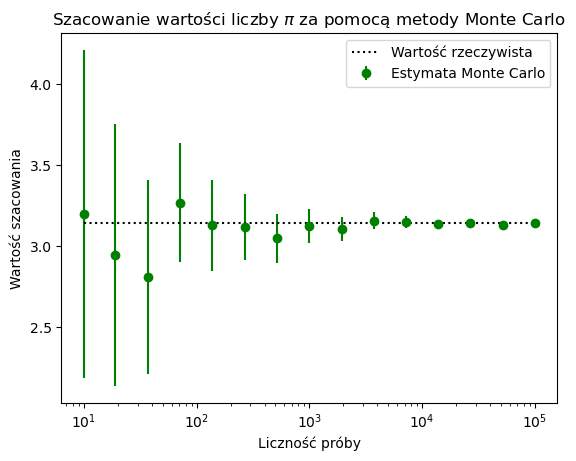

In [68]:
from matplotlib import pyplot as plt

plt.title("Szacowanie wartości liczby $\pi$ za pomocą metody Monte Carlo")
plt.errorbar(ns, pis, 2 * std_devs, fmt="go", label="Estymata Monte Carlo")
plt.plot([min(ns), max(ns)], [np.pi, np.pi], "k:", label="Wartość rzeczywista")
plt.xscale("log")
plt.xlabel("Liczność próby")
plt.ylabel("Wartość szacowania")
plt.legend(loc="best")
plt.show()

### Wykres zależności niepewności szacowania w skali logarytmicznej od liczności próby w skali logarytmicznej

Punkty leżą na prostej o współczynniku kierunkowym ok. $\frac{-4}{8} = -\frac{1}{2}$. Odpowiada to oczekiwanej wartości wyliczonej analitycznie, ze wzoru podanego w zadaniu:

$$\hat{\sigma}(\hat{\pi}) = V \sqrt{\frac{1}{N} \frac{M}{N} (1 - \frac{M}{N})}$$
$$\log(2 \hat{\sigma}(\hat{\pi})) = \log(\sqrt{\frac{1}{N}}) + \log(2 V \sqrt{\frac{M}{N} (1 - \frac{M}{N})})$$
$$\log(2 \hat{\sigma}(\hat{\pi})) \sim \log(N^{-\frac{1}{2}})$$
$$\log(2 \hat{\sigma}(\hat{\pi})) \sim -\frac{1}{2} \cdot \log(N)$$

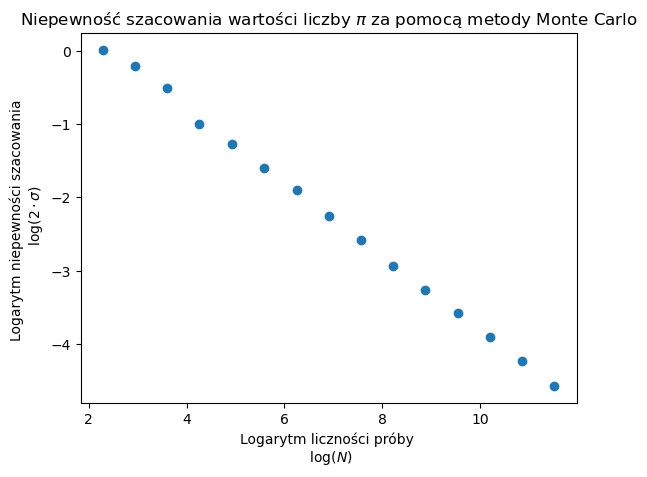

In [75]:
plt.title("Niepewność szacowania wartości liczby $\pi$ za pomocą metody Monte Carlo")
plt.scatter(np.log(ns), np.log(2 * std_devs))
plt.xlabel("Logarytm liczności próby \n $\log(N)$")
plt.ylabel("Logarytm niepewności szacowania \n $\log(2 \cdot \sigma)$")
plt.show()